# VPD control using automatic sprinklers system


## Introduction


In our project, we tried to create an automatic system that will control the VPD in a certain greenhouse using simple methods and equipment.
So the instant question is why we want to control the VPD and what is the effect of low or high VPD? to answer that we need to explain what is VPD.

VPD in its full name - vapor pressure deficit - is the difference between the amount of moisture in the air and how much moisture the air can hold when it is saturated. generally speaking, we know that the higher the temperature, the air can “hold” more water since the molecules of water have more energy and move faster and the chance to have condensation is lower, the opposite when the temperature is lower. For example, at 24 degrees the air can hold a max of 10 grams of water for each liter of air while at 40 degrees the amount of water is doubled to 20 grams of water for each liter of air. As we know plants open their pores to do photosynthesis and to take CO2 from the air and while that is happening water runs through the roots all the way up and goes out from the pores into the air. The discharge is determain mainly by the VPD which in simple words will be explained by how much the air “wants” water - the higher the VPD the more water will be lost from the pores. if the plant loose too much water it can also come to a point where it will close its pores which will obviously affect its productivity. another important fact will be the stage of the plant since we know not only water flow through the roots up the plants but also nutrients. We can roughly say that when the plant is young we will want lower VPD since the roots system is still weak to lose so much water but when in a later stage we will want higher VPD to let the plant have more nutrients when it bigger and need them more, of course, that must come with more water supply. We used plants in a very early stage and from that, we chose quite a low limit of VPD.
It is also important to mention that high relative humidity can also be harmful to the plants since it can cause diseases and rot. in our project we focused more on limiting the VPD and less on the relative humidity though we did limit the time of the sprinklers to consider this fact.
so to sum up the VPD we can say that the higher the temperature and the lower the relative humidity the VPD will be higher, and a high VPD level will make the air “want” more water which means higher discharge through the plants and the pores.

After saying all that and understanding the importance of VPD level when growing plants we chose the suitable time for taking our temperature and relative humidity measurements and chose a 1.5 KPa limit of VPD. when the VPD start to go higher then the pump started working and the sprinklers sprayed water for 3 seconds to make sure we lower it down. We will see in our results if it worked or not and we will discuss later on about the time between measurements and the level of success in controlling the VPD. 
  
 The project is not necessarily complicated which is one of the ideas behind it, to make one follow our steps using quite cheap equipment and a simple code and easily duplicate the system with personal adjustments like the level of VPD or the spraying time of the sprinklers.
but after talking about the importance of VPD levels we are happy to present a simple method to monitor and control it if it's for a private small greenhouse or even bigger ones.


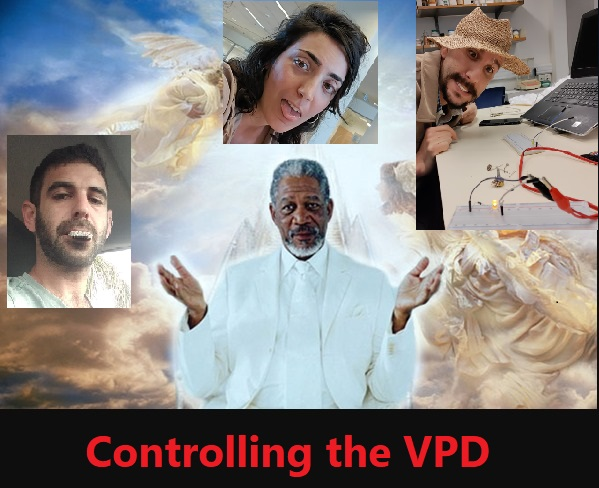

# methods

The first step in our project was to create a separate small greenhouse and install in it an SHT31 sensor that will collect temperature and RH data. This data is used to calculate the VPD which then we can decide the limit of the highest VPD we allowed in our greenhouse (in our case 1.5).

When the VPD reaches the decided limit a switch is turned on and starts the pump which supplies water to 4 sprinklers attached to the ceiling of the greenhouse.

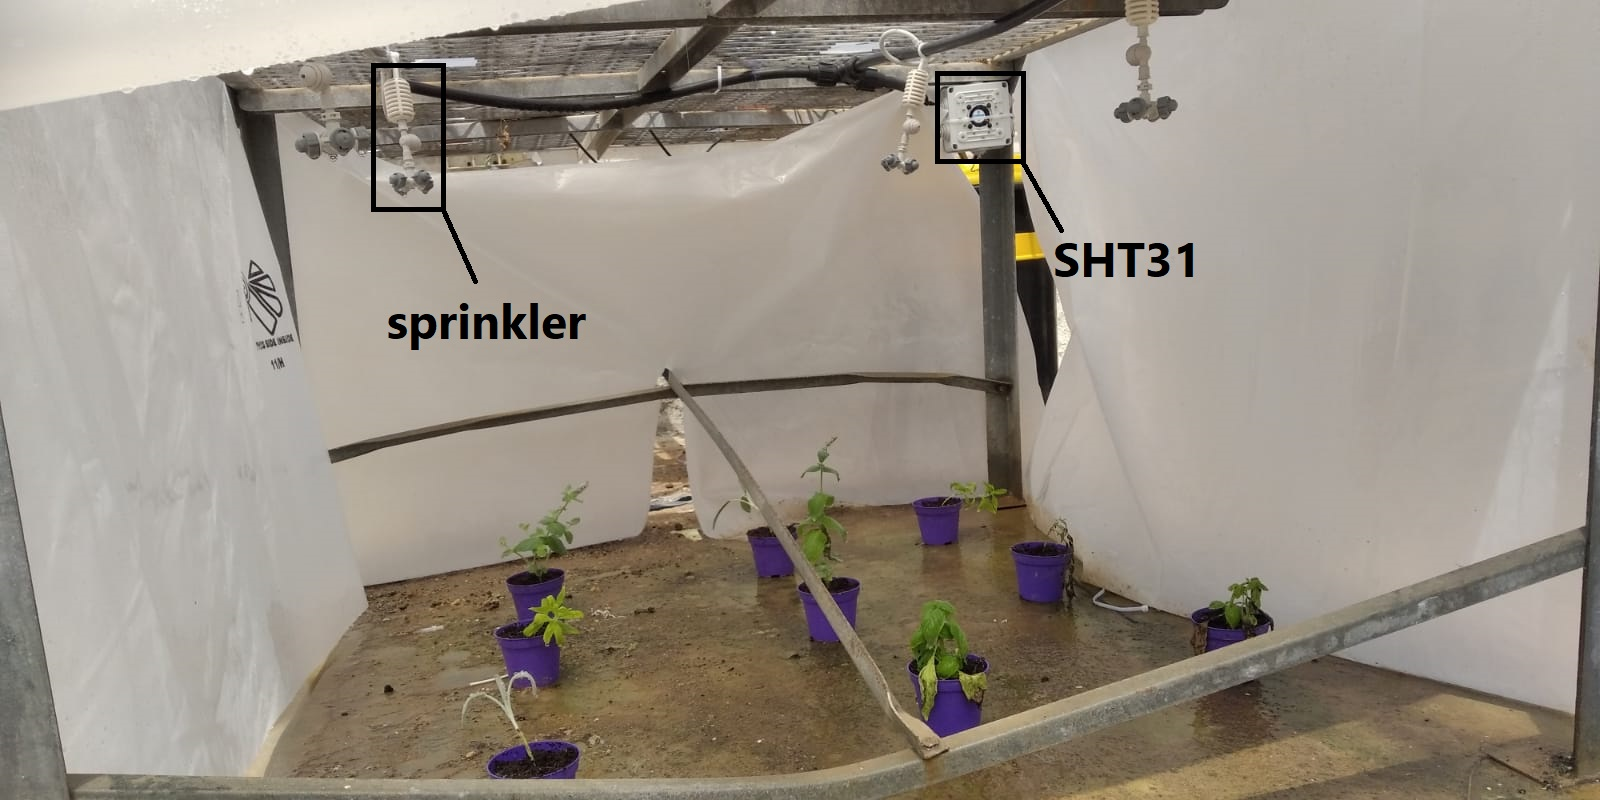

 the pump takes water from a big bucket next to the greenhouse which is filled from the water supply system using a mechanic float valve that controls the level of water inside the bucket.

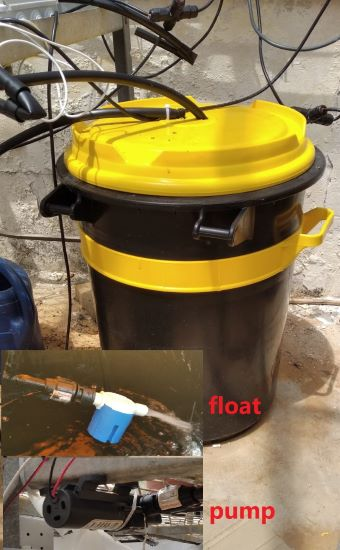

### to calculate the VPD we used the next equations:

$$
VPD = VP_s*\frac{100-RH}{100}
$$

$$
VP_s= \frac{610.7107*10^{7.5*T/237.3+T}}{1000}
$$




### specific measurments time, VPD limit and sprinklers working time

As we already mention to calculate the VPD we used an SHT31 sensor that collect temperatue and relative humidity. A measure was taken every 2 minutes which we believed is a good amount of measuring time gaps since the VPD is not a parameter that changes in a manner of seconds but in minutes or more.
After calculating the VPD we chose a limit of 1.5 KPa which we thought will suite our young plants that still dont have big root system. when the VPD measured was higher then 1.5 KPa the pump started to work for 3 seconds (a relative short time to assure water does not cumulative on the foliage and to avoid as much as we can from diseases or rot as we mentioned before). 

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]

In [4]:
import urllib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path
import matplotlib.dates as mdates
import datetime as dt
import matplotlib as mpl
from pandas.tseries.frequencies import to_offset
from scipy.signal import savgol_filter
from matplotlib.patches import Wedge
import turtle


Download data from Thingspeak

In [5]:
filename1 = "the_project.csv"
# if file is not there, go fetch it from thingspeak
if not os.path.isfile(filename1):
    # define what to download
    channels = "1708067"
    fields = "1,2,3"
    minutes = "30"

    # https://www.mathworks.com/help/thingspeak/readdata.html
    # format YYYY-MM-DD%20HH:NN:SS
    start = "2022-07-14%2012:00:00"
    end = "2022-07-17%2000:00:00"

    # download using Thingspeak's API
    # url = f"https://api.thingspeak.com/channels/{channels}/fields/{fields}.csv?minutes={minutes}"
    url = f"https://api.thingspeak.com/channels/{channels}/fields/{fields}.csv?start={start}&end={end}"
    data = urllib.request.urlopen(url)
    d = data.read()

    # save data to csv
    file = open(filename1, "w")
    file.write(d.decode('UTF-8'))
    file.close()


crating a new Data frame

In [6]:
# load data
df = pd.read_csv(filename1)
# rename columns
df = df.rename(columns={"created_at": "timestamp",
                        "field1": "Temp",
                        "field2": "RH",
                        "field3": "VPD",})
# set timestamp as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df

,entry_id,Temp,RH,VPD
timestamp,,,,
2022-07-14 12:01:45+00:00,367580,35.97,74.73,1.49845
2022-07-14 12:03:56+00:00,367581,36.09,71.24,1.71667
2022-07-14 12:06:05+00:00,367582,36.17,72.79,1.63129
2022-07-14 12:08:14+00:00,367583,36.15,73.04,1.61453
2022-07-14 12:10:25+00:00,367584,36.07,73.44,1.58361
...,...,...,...,...
2022-07-16 23:50:52+00:00,369289,25.41,88.14,0.38489
2022-07-16 23:52:57+00:00,369290,25.39,88.08,0.38637
2022-07-16 23:55:03+00:00,369291,25.38,88.05,0.38712


### First graph - VPD in time
In the next graph, we can see the VPD changes over time. We create a black line in the limit of 1.5 KPa as we decided which separates the green area and the red area. In that way, it is easy and very clear to see what are the good areas and the bad ones and the status of the VPD. We can see in the graph that the VPD does not climb above 1.5 KPa it is only level with it or below it as we hope it to be.


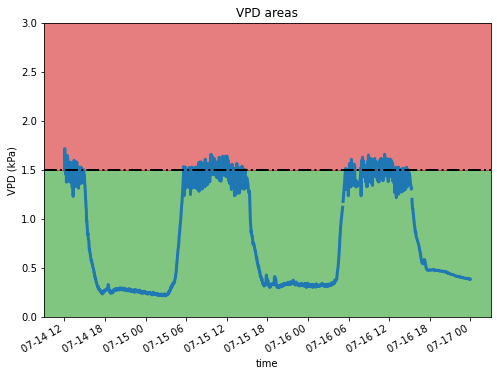

In [7]:
# %matplotlib widget

fig, ax = plt.subplots(1, figsize=(8,6))

ax.plot(df['VPD'], linewidth=3)
# add labels and title
ax.set(xlabel = "time",
       ylabel = "VPD (kPa)",
       title = "VPD areas")
# makes slanted dates
plt.gcf().autofmt_xdate()
# Plot a horizontal line using axhline() in pyplot
plt.axhline(y=1.5, color='black', linestyle='-.', linewidth=2)
ax.axhspan(0, 1.5,color='tab:green',alpha=0.6)
ax.axhspan(1.5,3,color='tab:red',alpha=0.6)
plt.ylim(0, 3)
plt.show()


### Second graph - Temp and RH
We can see in the next graph two parameters, one is the relative humidity (blue) and one is the temperature (orange) which both of them are raw data from our the SHT31 sensor. generally speaking, we can see that when the temperature climbs the relative humidity goes down and when the temperature goes down the relative humidity goes up.


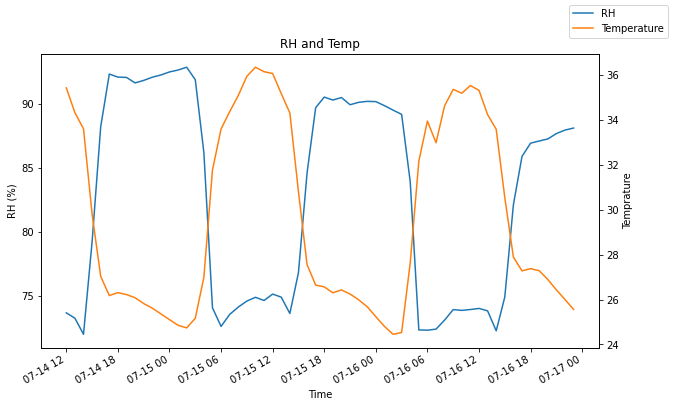

In [9]:
# %matplotlib widget

fig, ax = plt.subplots(1, figsize=(10,6))
RH_smooth = df['RH'].resample("1h").mean().to_frame()#resmaplimg for smoother graph
ax.plot(RH_smooth, color="tab:blue", label="RH")
# add labels and title
ax.set(xlabel = "Time",
       ylabel = "RH (%)",
       title = "RH and Temp",
       )
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
Temp_smooth = df['Temp'].resample("1h").mean().to_frame()#resmaplimg for smoother graph
ax2.plot(Temp_smooth, color="tab:orange", label="Temperature")
ax2.set_ylabel("Temprature")
# makes slanted dates
plt.gcf().autofmt_xdate()
fig.legend(loc="upper right")

In [10]:
filename2 = "the_other_data.csv"
# if file is not there, go fetch it from thingspeak
if not os.path.isfile(filename2):
    # define what to download
    channels = "1690485"
    fields = "1,2,6"

   # https://www.mathworks.com/help/thingspeak/readdata.html
    # format YYYY-MM-DD%20HH:NN:SS
    start = "2022-07-14%2012:00:00"
    end = "2022-07-17%2000:00:00"

    # download using Thingspeak's API
    # url = f"https://api.thingspeak.com/channels/{channels}/fields/{fields}.csv?minutes={minutes}"
    url = f"https://api.thingspeak.com/channels/{channels}/fields/{fields}.csv?start={start}&end={end}"
    data = urllib.request.urlopen(url)
    d = data.read()

    # save data to csv
    file = open(filename2, "w")
    file.write(d.decode('UTF-8'))
    file.close()


In [11]:
# load data
df2 = pd.read_csv(filename2)
# rename columns
df2 = df2.rename(columns={"created_at": "timestamp",
                        "field1": "Temp2",
                        "field2": "RH2",
                        "field6": "VPD2",})
# set timestamp as index
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2 = df2.set_index('timestamp')
df2

,entry_id,Temp2,RH2,VPD2
timestamp,,,,
2022-07-14 15:21:06+00:00,24736,27.33,77.98,0.79498
2022-07-14 15:21:32+00:00,24737,27.30,78.17,0.78675
2022-07-14 15:21:59+00:00,24738,27.22,78.34,0.77698
2022-07-14 15:22:26+00:00,24739,27.20,78.40,0.77393
2022-07-14 15:22:51+00:00,24740,27.06,78.72,0.75625
...,...,...,...,...
2022-07-16 23:58:09+00:00,32731,22.94,88.21,0.32809
2022-07-16 23:58:34+00:00,32732,22.92,88.22,0.32741
2022-07-16 23:58:59+00:00,32733,22.91,87.63,0.34360


### Third graph -  Our VPD against the VPD without sprinklers control
The next graph demonstrates well our goals. We used a data from a sensor which is located outside of our small greenhouse (but inside the big greenhouse) and calculate its VPD. We can see for example when the VPD is potentially very high during the day and reach around 2-4 KPa outside, our system works and keep the level of VPD not higher than 1.5 KPa. When the VPD goes under 1.5 KPa outside both curves are around the same VPD level.


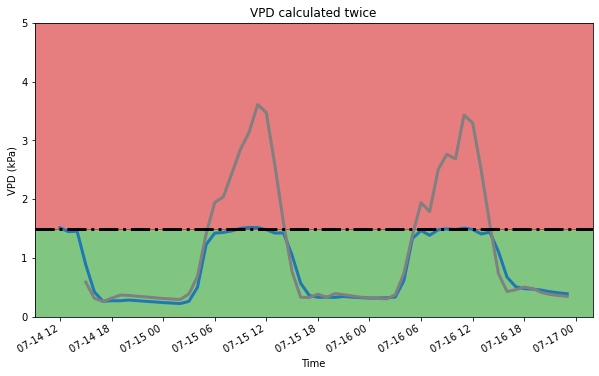

<Figure size 432x288 with 0 Axes>

In [12]:
# %matplotlib widget


fig, ax = plt.subplots(1, figsize=(10,6))
VPD_smooth = df['VPD'].resample("1h").mean().to_frame()
VPD_smooth_2 = df2['VPD2'].resample("1h").mean().to_frame()
ax.plot(VPD_smooth, color="tab:blue", label="VPD inside the mini greenhouse",linewidth=3)
ax.plot(VPD_smooth_2, color="gray", label="VPD ouside",linewidth=3)

# add labels and title
ax.set(xlabel = "Time",
       ylabel = "VPD (kPa)",
       title = "VPD calculated twice",
       ylim=[0,5],
       )
# makes slanted dates
plt.gcf().autofmt_xdate()
# Plot a horizontal line using axhline() in pyplot
plt.axhline(y=1.5, color='black', linestyle='-.', linewidth=3)
ax.axhspan(0, 1.5,color='tab:green',alpha=0.6)
ax.axhspan(1.5,5,color='tab:red',alpha=0.6)
plt.show()
plt.gcf().autofmt_xdate()
ax.legend(loc="upper right")

###  Fourth graph - Rolling average 
In the next graph, we can see a rolling average. The idea of a rolling average is to clear noises and to see the trend better. when we look at the orange line which represents the rolling average we can now see that our VPD stays lower than 1.5 KPa on average at all time.


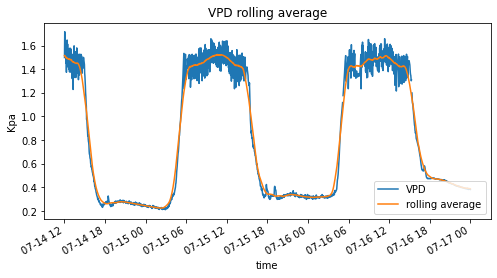

In [13]:
# %matplotlib widget

fig, ax = plt.subplots(1, figsize=(8,4))

# apply a rolling average of size "window_size",
# it can be either by number of points, or by window time
window_size = '2h'  # minutes
VPD_smooth = df['VPD'].rolling(window_size, center=True).mean().to_frame()
VPD_smooth.rename(columns={'VPD': 'rolling_avg'}, inplace=True)
ax.plot(df['VPD'], color="tab:blue", label="VPD")
ax.plot(VPD_smooth['rolling_avg'], color="tab:orange", label="rolling average")
# add labels and title
ax.set(xlabel = "time",
       ylabel = "Kpa",
       title = "VPD rolling average")
# makes slanted dates
plt.gcf().autofmt_xdate()
ax.legend(loc="lower right")

### Discution
After briefly reviewing our results we can now dive deeper and try to understand them better.

Let's start by talking on the relative humidity and temperature graph. As we said, we can see especially during night time that when the temperature goes down the relative humidity goes up (that's what happens without intervening in the situation) and the reason is the same like we explained in the intruduction - the amount of water in the air stays more or less the same but the part of it from the maximum water that the air can hold is bigger at a low temperature and relative humidity goes up. During day time when the temperature rises significantly the relative humidity goes down but with our sprinkler system we spray tiny drops of water into the air which evaporates immediately and higher up the relative humidity. let's remember in the VPD equation:

$$
VPD = VP_s*\frac{100-RH}{100}
$$

It's easy to see now that when the RH rises the VPD goes down which was our initial goal.

If we discuss more on our second parameter - the temperature - and our effect on it with the sprinklers we can say that it also lowers the temperature since the evaporation of the tiny drops cooler down the greenhouse. We already mention that lower temperature pushes the VPD down but it is also easy to see that with the first VPs equation: 
$$
VP_s= \frac{610.7107*10^{7.5*T/237.3+T}}{1000}
$$

We can see here that the lower the temperature the VPs will go down and when looking again at our VPD equation we can see the same effect of lowering the VPD.

To sum up, we can see that using the sprinklers we controlled mainly on the relative humidity but also the temperature and both aspects contribute to low VPD. 
So the sprinklers system worked but it is important to say that when using them we were exposed to diseases and rot and now when understanding more the equations it was optional to control the VPD maybe with air-conditioning or different methods that will lower the temperature and avoid the spraying. All of these assumptions are obviously depend and needed to be suited to the growing and the plants we choose in our greenhouse.

After talking widely about the temperature and the relative humidity we can now focus on our final VPD results and the comparison between the VPD inside our greenhouse and outside (but inside the bigger greenhouse).
So our goal was to control the VPD and to assure it will not rise above the limit of 1.5 KPa. When looking at the VPD outside and considering the fact that we are in the hot summer of Israel we expected that the VPD will go higher than 1.5 KPa every day around the late morning throughout the noon for a few good hours and that is reflected on the VPD curve without the sprinklers control. When looking at our VPD curve with the sprinklers control it is nice to see that when we suppose to receive high VPD without our intervention we managed to lower it down and keeping it at our decided level.
It is important to notice the fact that we only decided on the upper border of the VPD but we didn't tried to control the lower border of the VPD so during night time both curves are more or less even and the sprinklers didn't work at all during night time.

To sum up we used sensors and calculations to find the VPD in a small greenhouse that we created. We decided on a limit of VPD and controlled it by using a sprinkler system connected to a pump and a big water bucket. We can say that our simple and easy-to-build system has worked well and can be happily used by others.

